#### Finding Optimal Model and Hyperparameters

**Exercise**
- Finding best model and hyper parameters for sklearn digits dataset classification

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
from matplotlib import pyplot as plt

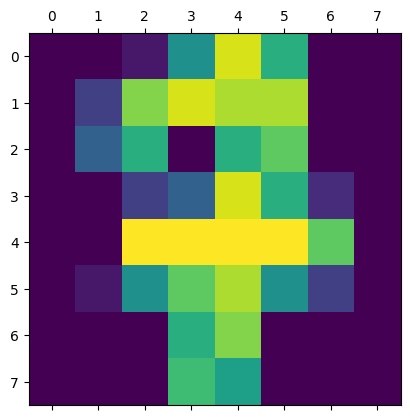

In [7]:
plt.matshow(digits.data[17].reshape(8, 8))

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [10]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
X = df
y = digits.target

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_params = {
    'svm': {
        'model': SVC(gamma = 'auto'),
        'params' : {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 20, 30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'gaussian_nb' :{
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomial_nb': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.2, 0.5, 1]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    }
    }

In [18]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 10, return_train_score = False)
    clf.fit(X_scaled, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.967716,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.943802,{'n_estimators': 20}
2,logistic_regression,0.940419,{'C': 1}
3,gaussian_nb,0.789687,{}
4,multinomial_nb,0.878122,{'alpha': 0.5}
5,decision_tree,0.829174,{'criterion': 'log_loss'}


In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
scores_rand = []

for model_name, mp in model_params.items():
    clf__rand =  RandomizedSearchCV(mp['model'], mp['params'], cv = 10, return_train_score = False)
    clf__rand.fit(X_scaled, y)
    scores_rand.append({
        'model': model_name,
        'best_score': clf__rand.best_score_,
        'best_params': clf__rand.best_params_
    })
    
df = pd.DataFrame(scores_rand,columns=['model','best_score','best_params'])
df

c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 i

,model,best_score,best_params
0,svm,0.967716,"{'kernel': 'rbf', 'C': 20}"
1,random_forest,0.942657,{'n_estimators': 30}
2,logistic_regression,0.940419,{'C': 1}
3,gaussian_nb,0.789687,{}
4,multinomial_nb,0.878122,{'alpha': 0.5}
5,decision_tree,0.827480,{'criterion': 'gini'}
